In [1]:
import sys
import os

import geopandas as gpd
import pandas as pd

from shapely.geometry import Polygon
from osgeo import gdal

In [2]:
def get_extend(file_path):
    src = gdal.Open(file_path)
    ulx, xres, xskew, uly, yskew, yres  = src.GetGeoTransform()
    lrx = ulx + (src.RasterXSize * xres)
    lry = uly + (src.RasterYSize * yres)
    return(ulx,uly,lrx,lry)

In [62]:
path_ortho = '/media/philipp/Seagate Desktop Drive/2017/2017460_salzburg_lb_rgbi.img'
ulx,uly,lrx,lry = get_extend(path_ortho)

print('upper left corner: ', ulx, uly)
print('lower right corner: ', lrx, lry)

upper left corner:  355013.2454996109 468679.0623247711
lower right corner:  451235.0454996109 416694.86232477106


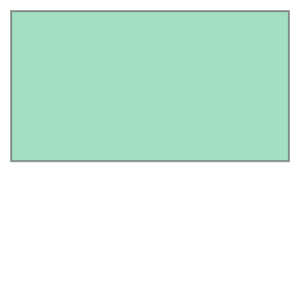

In [63]:
Polygon([(ulx, uly), (lrx, uly), (lrx, lry), (ulx, lry)])

In [64]:
d = {'name': ['Salzburg'], 'year': [2017], 'file': ['2017460_salzburg_lb_rgbi.img'], 'geometry': [Polygon([(ulx, uly), (lrx, uly), (lrx, lry), (ulx, lry)])]}

In [65]:
gdf = gpd.GeoDataFrame(d, crs="EPSG:31287")

In [66]:
gdf.to_file("/home/philipp/Data/edin_diss/GIS_meta/2017/salzburg/salzburg.shp")